In [1]:
import sys
import os
import json
from pprint import pprint
import glob
import numpy as np
import pandas as pd
from statistics import mean

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
import matplotlib

matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.dpi']= 200
matplotlib.rcParams['figure.figsize']= (10, 8)

import matplotlib.gridspec as gridspec

In [3]:
import csv

In [4]:
exposure_trigger = []
exposure_GPIO = []
exposure_t_exp = []
any_trigger = []
any_GPIO = []
any_t_exp = []
global_trigger = []
global_GPIO = []
global_t_exp = []
clock_ticks_per_second = 1000000

with open("trigger_data/exposureActive.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        if row[0] != "GPIO Output":
            exposure_GPIO.append(int(row[0]))
            exposure_trigger.append(int(row[1]))
            exposure_t_exp.append(int(row[2]))
        else:
            print(row[3])
with open("trigger_data/anyPixel.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        if row[0] != "GPIO Output":
            any_GPIO.append(int(row[0]))
            any_trigger.append(int(row[1]))
            any_t_exp.append(int(row[2]))
with open("trigger_data/globalReset.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        if row[0] != "GPIO Output":
            global_GPIO.append(int(row[0]))
            global_trigger.append(int(row[1]))
            global_t_exp.append(int(row[2]))

 clock ticks per second=1000000


In [5]:
exposure_clock_delay = []
any_clock_delay = []
global_clock_delay = []

for i in range(len(exposure_trigger)):
    exposure_clock_delay.append(exposure_GPIO[i] - exposure_trigger[i])
for i in range(len(any_trigger)):
    any_clock_delay.append(any_GPIO[i] - any_trigger[i])
for i in range(len(global_trigger)):
    global_clock_delay.append(global_GPIO[i] - global_trigger[i])
    
print(global_clock_delay)

[18, 54, 0, 78, 64, 0, 0, 0, 42, 56, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 0, 77, 0, 0, 0, 0, 64, 0, 62, 0, 96, 58, 68, 0, 0, 0, 71, 0, 0, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 60, 0, 0, 0, 0, 91, 0, 0, 0, 0, 0, 78, 0, 0, 0, 41, 62, 0, 0, 0, 0, 0, 0, 0, 36, 0, 0, 0, 65, 0, 71, 0, 0, 0, 0, 71, 0, 55, 0, 0, 0, 0, 0, 0, 80, 0, 0, 0, 0, 0, 0, 0, 60, 0, 77, 0, 0, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 50, 45, 0, 62, 0, 0, 0, 0, 0, 58, 0, 0, 0, 41, 0, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 0, 0, 0, 78, 60, 0, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, 0, 92, 0]


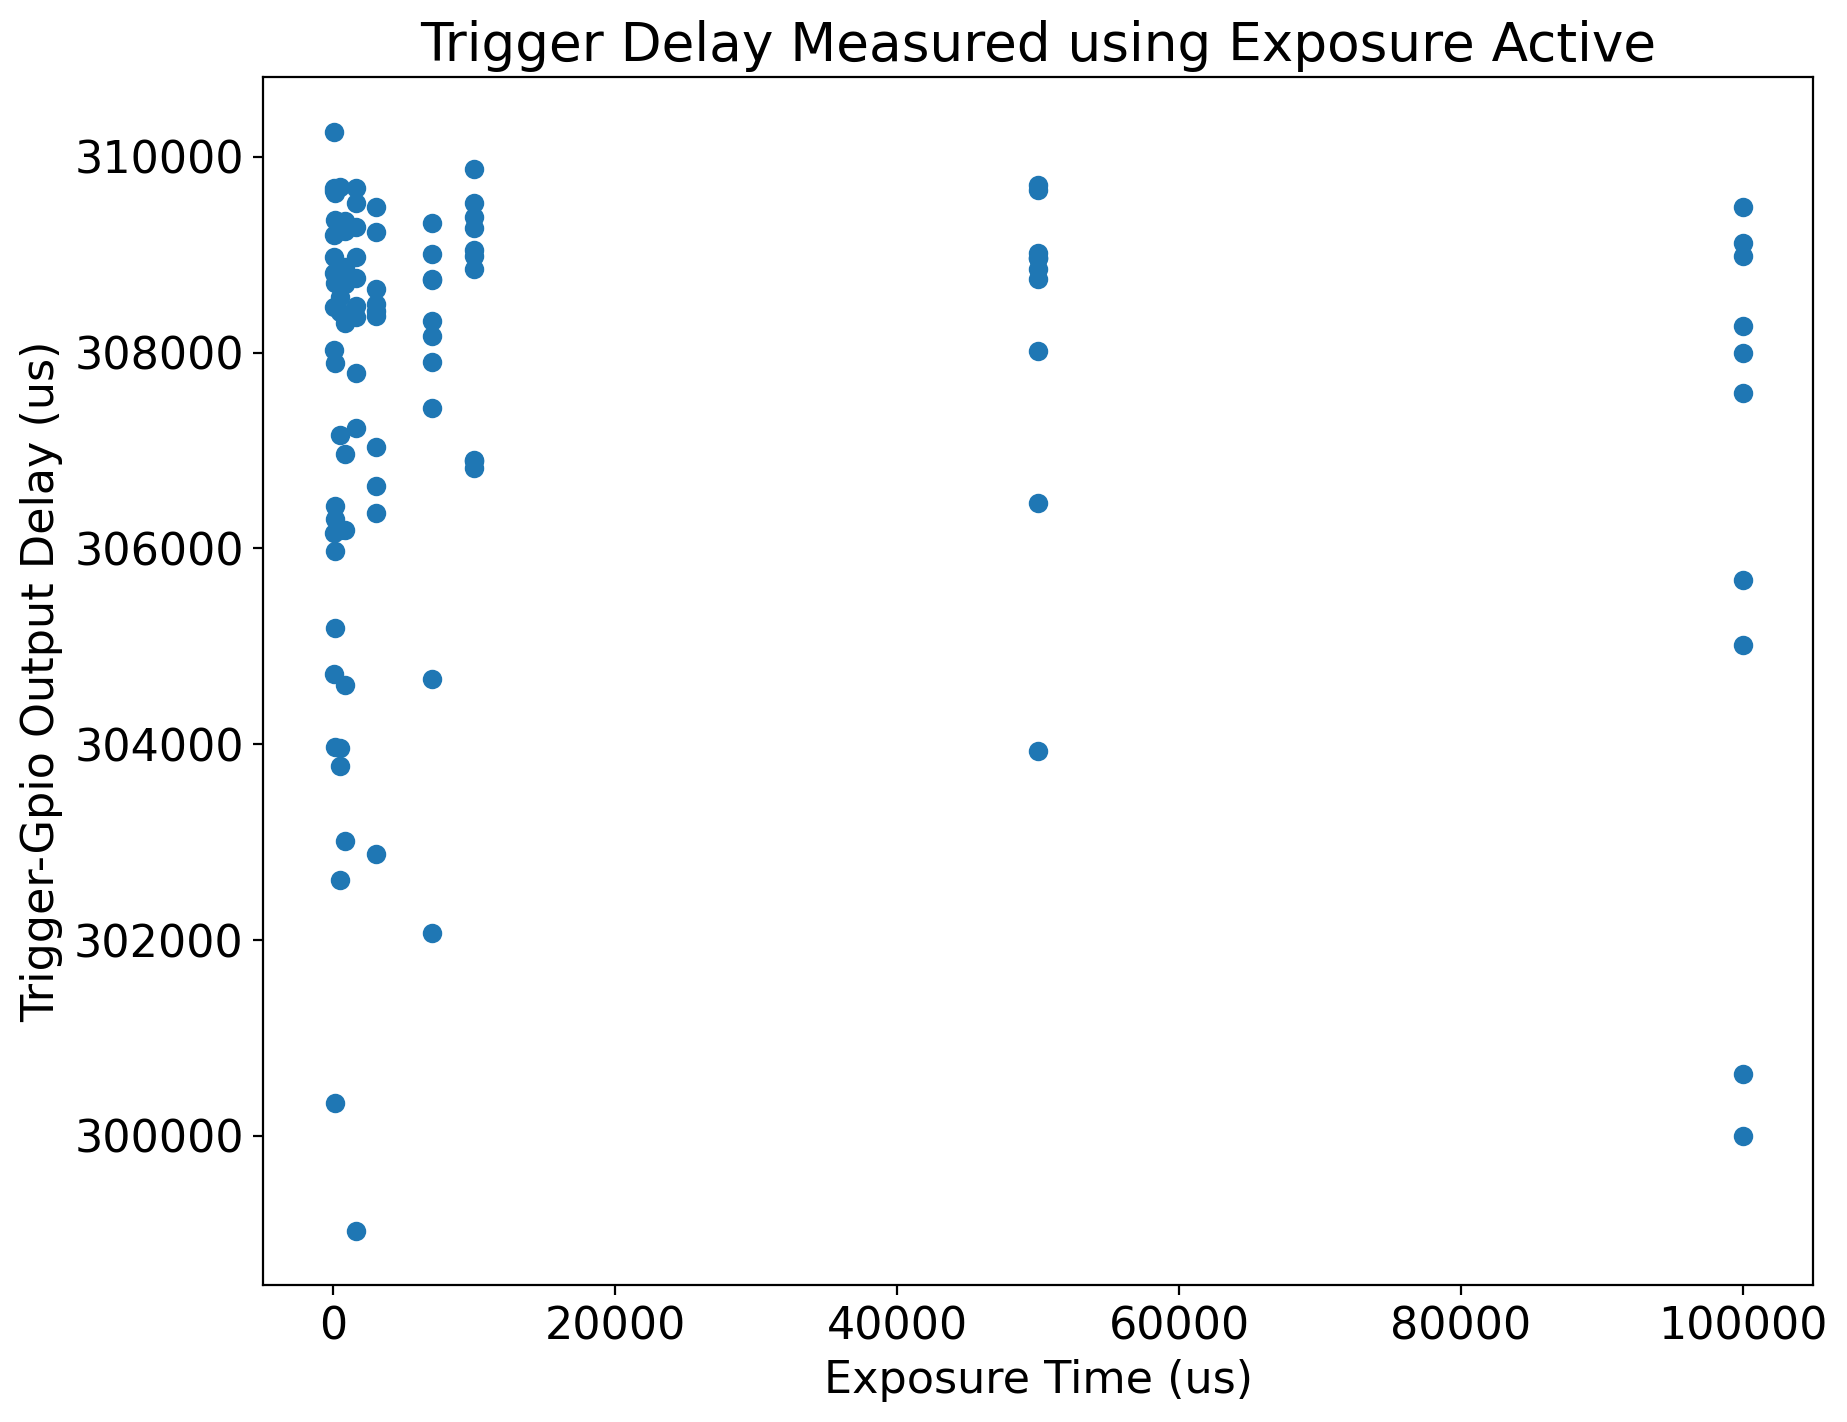

In [6]:
plt.scatter(exposure_t_exp, exposure_clock_delay)
plt.xlabel("Exposure Time (us)")
plt.ylabel("Trigger-Gpio Output Delay (us)")
plt.title("Trigger Delay Measured using Exposure Active")
plt.show()

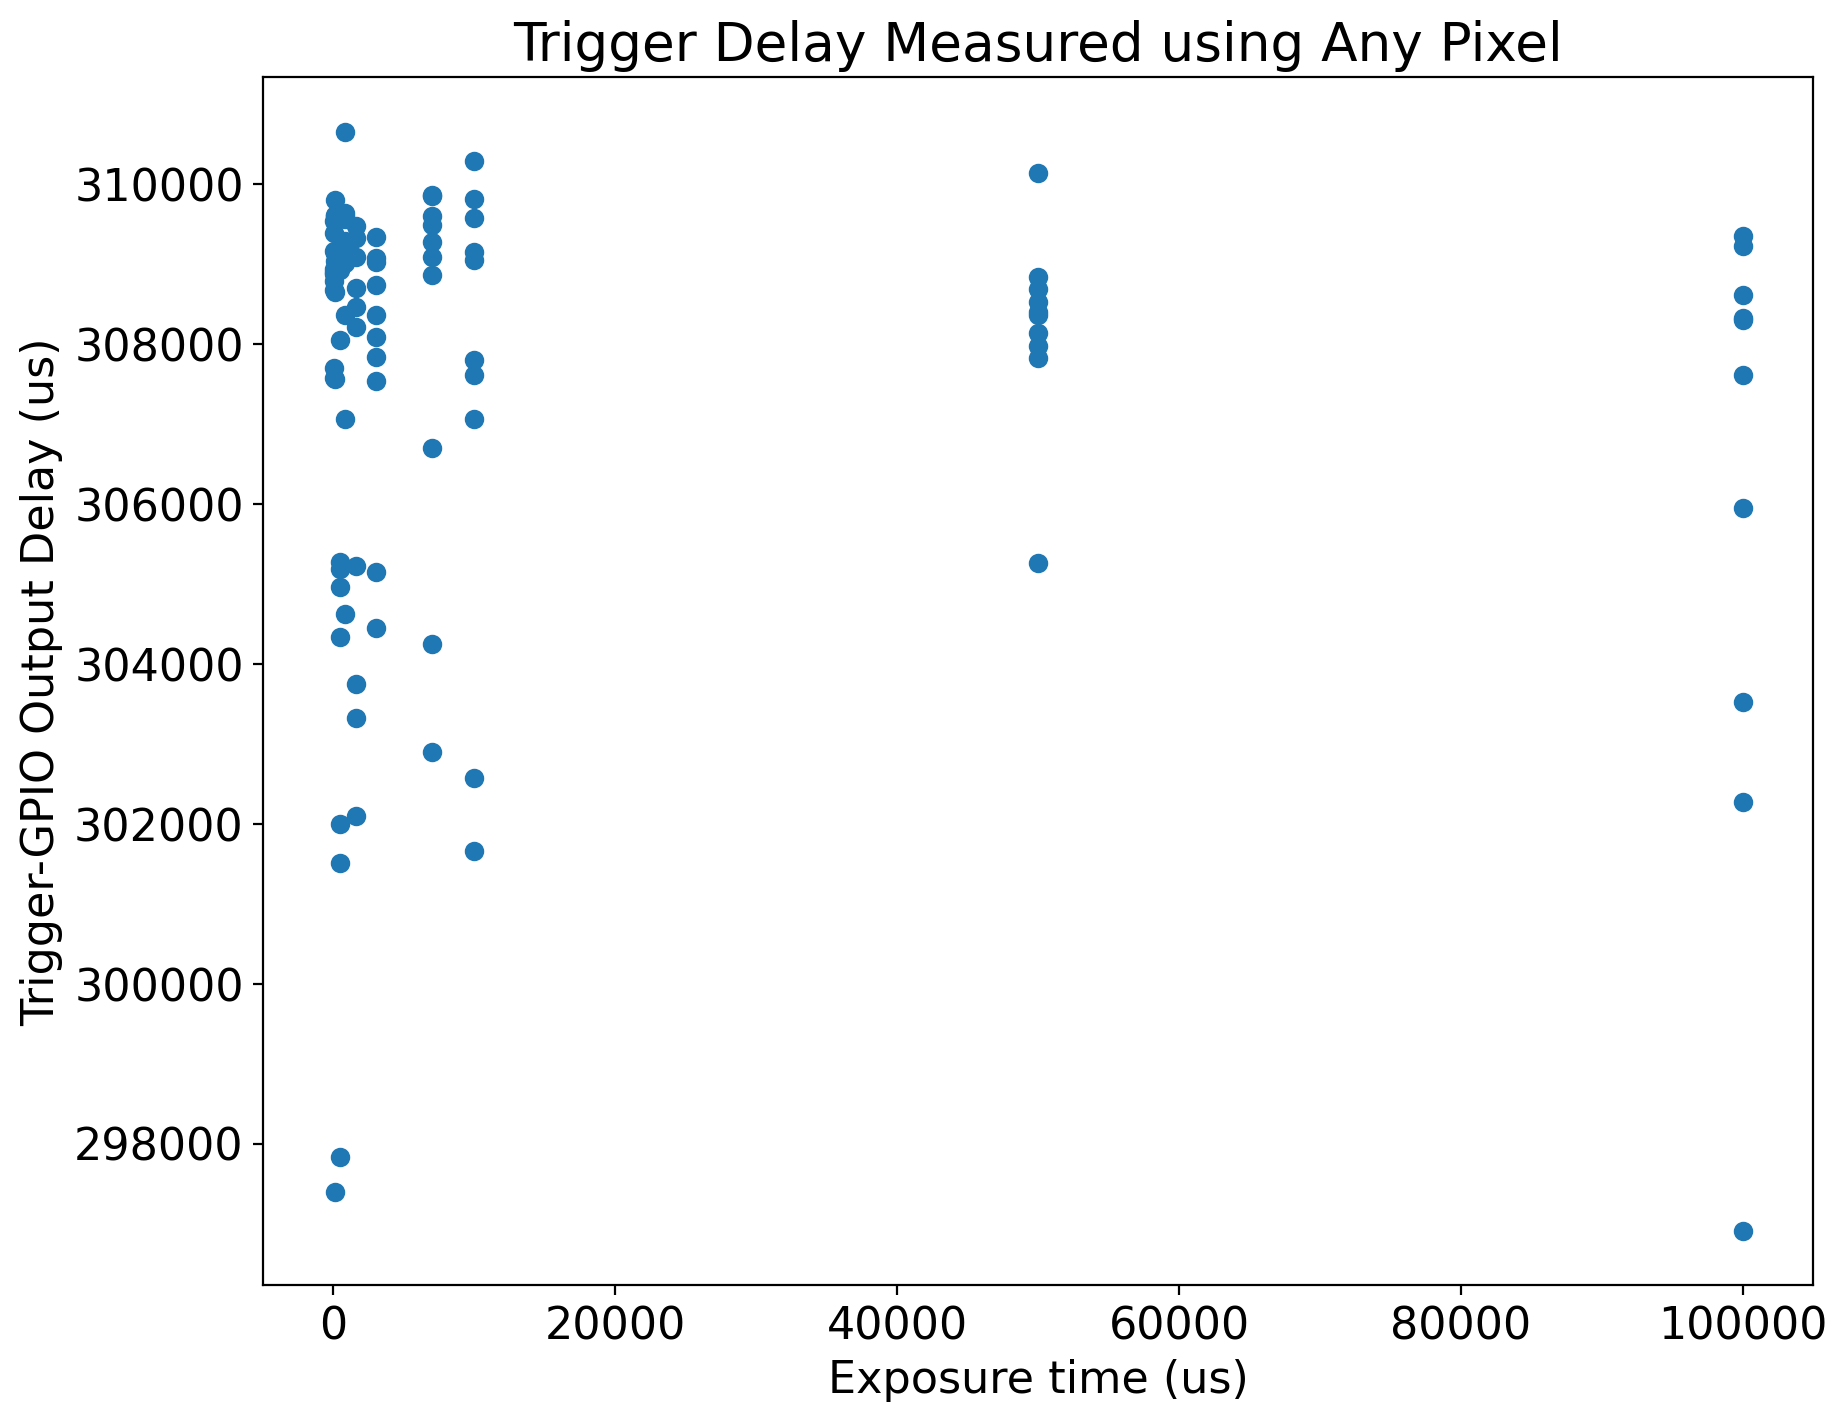

In [7]:
plt.scatter(any_t_exp, any_clock_delay)
plt.xlabel("Exposure time (us)")
plt.ylabel("Trigger-GPIO Output Delay (us)")
plt.title("Trigger Delay Measured using Any Pixel")
plt.show()

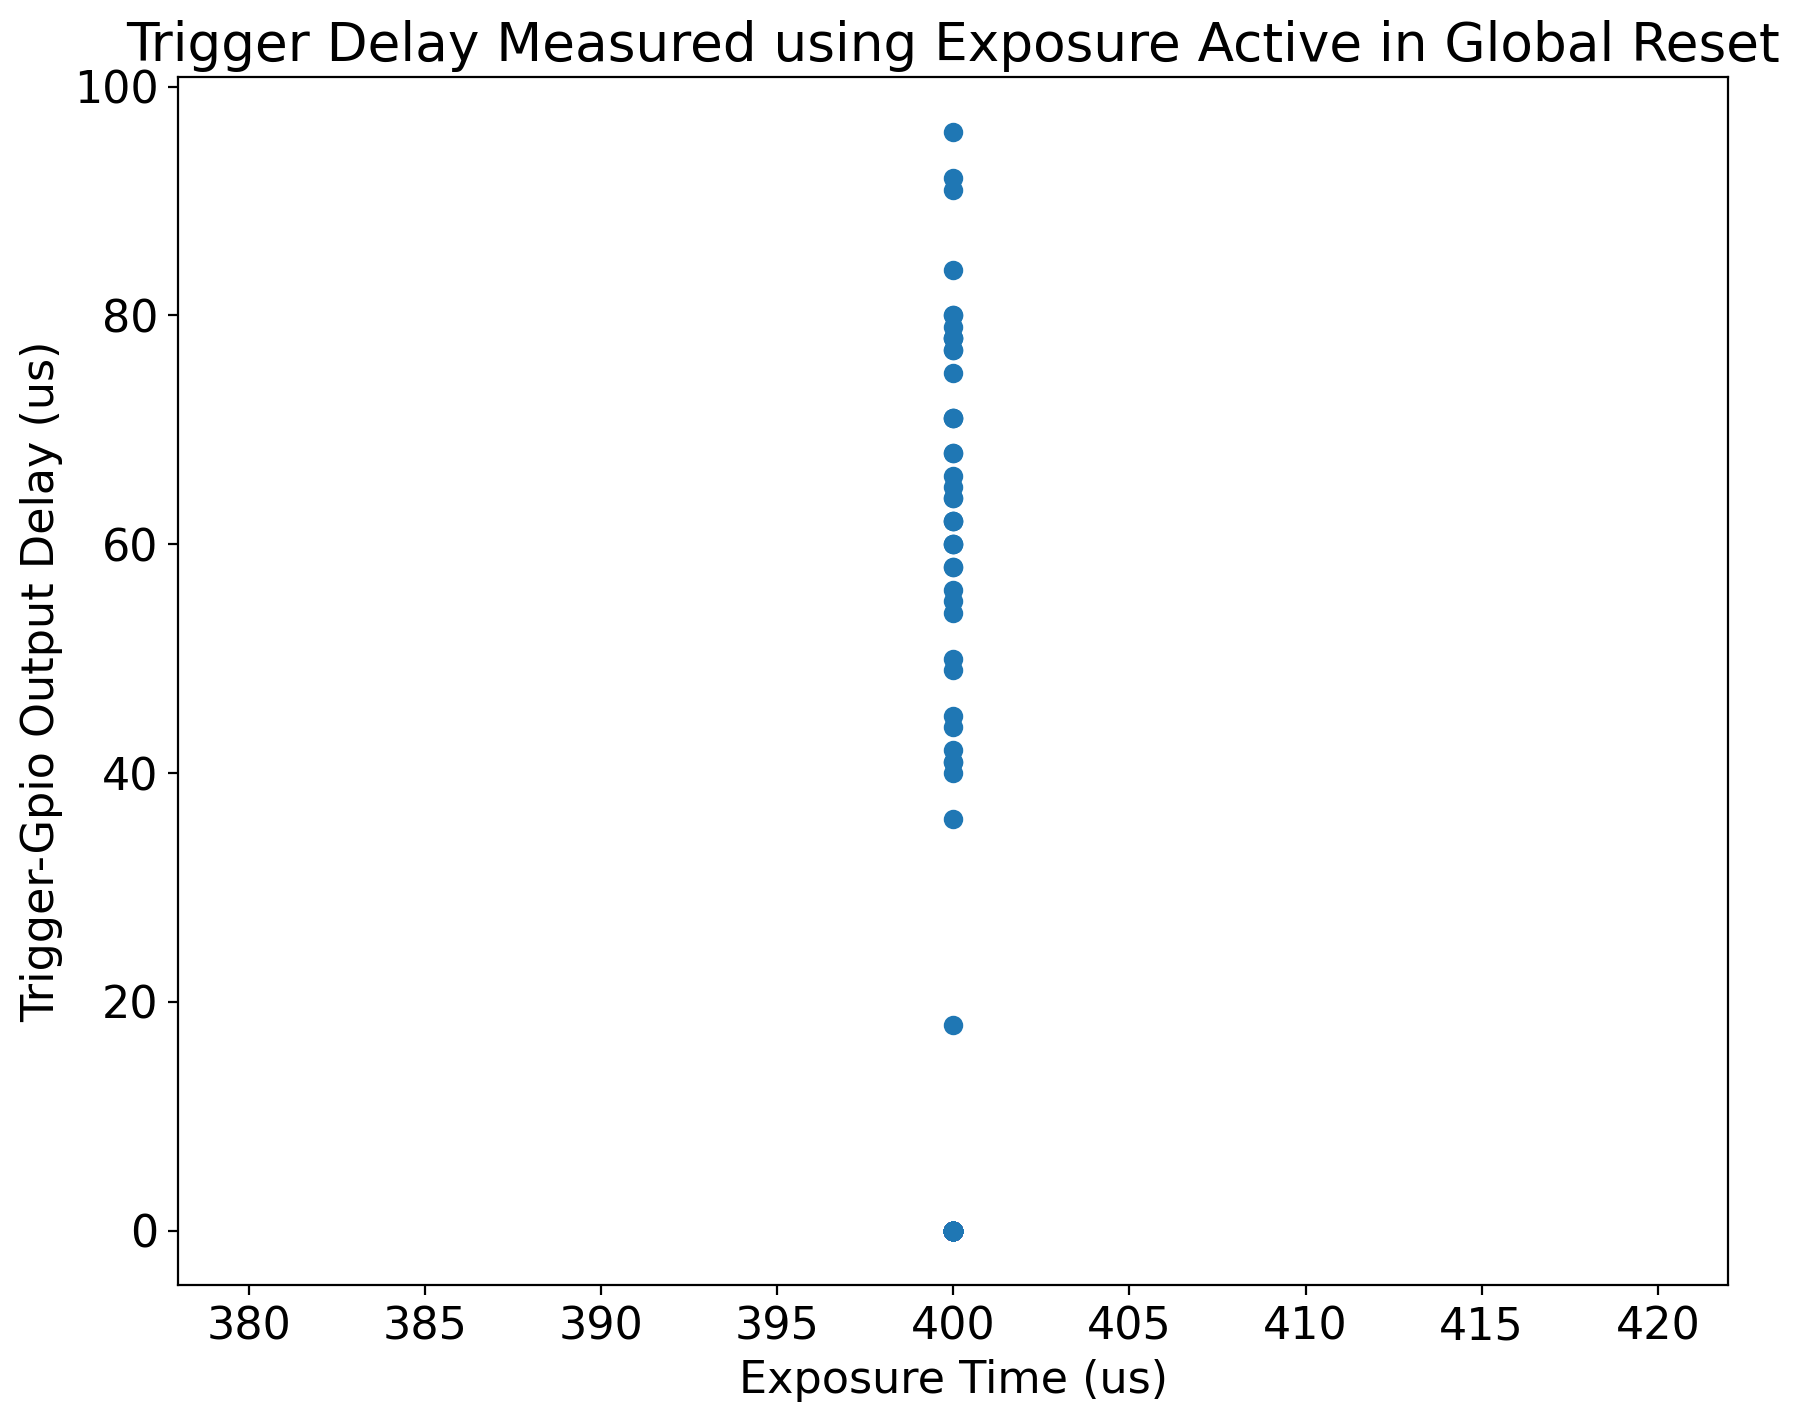

In [9]:
plt.scatter(global_t_exp, global_clock_delay)
plt.title("Trigger Delay Measured using Exposure Active in Global Reset")
plt.xlabel("Exposure Time (us)")
plt.ylabel("Trigger-Gpio Output Delay (us)")
plt.show()